## Таблица разностей

Дано 10 точек - результатов эксперимента.
Таблица конечных разностей содержит приращения исследуемой функции и её производных при фиксированном значении приращения аргумента

$$ A[i,j]=\Delta y_{i} - \Delta y_{i-1} $$

In [4]:
import numpy as np
A = np.loadtxt('/home/temp/data.csv', delimiter = '\t')
#print(A)

N = np.zeros((10,2))
for i in range (10):
    for j in range(2):
        N[i][j] = A[i+40][j]
print(N)

T = np.zeros((10,10))
for i in range(10):
    T[i][0] = N[i][1]
#for i in range(1,10):
   # T[i][1] = N[i][1]-N[i-1][1]
#print(T)
for j in range(1,10):
    for i in range(1,11-j):
        T[i-1][j] = T[i][j-1] - T[i-1][j-1]
np.set_printoptions(suppress = True, precision = 4, linewidth = 100)
print(T)

FileNotFoundError: [Errno 2] No such file or directory: '/home/temp/data.csv'

In [5]:
import numpy as np

T = np.zeros((10,10))
T[0][0] = 0.0
T[1][0] = 8.037451
T[2][0] = 15.89357
T[3][0] = 22.72513
T[4][0] = 27.73269
T[5][0] = 30.25
T[6][0] = 29.82532
T[7][0] = 26.2854
T[8][0] = 19.77381
T[9][0] = 10.75785

for j in range(1,10):
    for i in range(1,11-j):
        T[i-1][j] = T[i][j-1] - T[i-1][j-1]
np.set_printoptions(suppress = True, precision = 5, linewidth = 100)
print(T)

[[  0.        8.03745  -0.18133  -0.84323   0.04379   0.0894   -0.00809  -0.00925   0.00094   0.0016 ]
 [  8.03745   7.85612  -1.02456  -0.79944   0.13319   0.08132  -0.01734  -0.00831   0.00254   0.     ]
 [ 15.89357   6.83156  -1.824    -0.66625   0.21451   0.06398  -0.02565  -0.00577   0.        0.     ]
 [ 22.72513   5.00756  -2.49025  -0.45174   0.27849   0.03833  -0.03142   0.        0.        0.     ]
 [ 27.73269   2.51731  -2.94199  -0.17325   0.31682   0.00691   0.        0.        0.        0.     ]
 [ 30.25     -0.42468  -3.11524   0.14357   0.32373   0.        0.        0.        0.        0.     ]
 [ 29.82532  -3.53992  -2.97167   0.4673    0.        0.        0.        0.        0.        0.     ]
 [ 26.2854   -6.51159  -2.50437   0.        0.        0.        0.        0.        0.        0.     ]
 [ 19.77381  -9.01596   0.        0.        0.        0.        0.        0.        0.        0.     ]
 [ 10.75785   0.        0.        0.        0.        0.        0.       

# Интерполяция методом Ньютона вперёд

Для составленной таблицы конечных разностей интерполяционный многочлен Ньютона строится по следующей формуле:

$$ P{n}(x) = f(x0) + \Delta^1 f(x0)(x-x0)/1!h^1  + \Delta^2 f(x0) (x-x0)(x-x1)/2!h^2 + ... + \Delta^n f(x0) (x-x0)(x-x1)...(x-x(n-1))/n!h^n$$

где h - длина шага, \Delta^k f(x0) - приращение из верхней строчки таблицы конечных разностей, k=0,1,...,n.

In [6]:
x0=5
h=0.1
def q(x):
    return (x-x0)/h



In [7]:
def P(n,x):
    P=0
    m=1
    for i in range(1,n):
        m = m*(q(x)-i+1)
        P += T[0][i]*m/np.math.factorial(i)
    return P

In [8]:
X = []
Y=[]
for i in range(10):
    X.append(x0+0.1*i)
    Y.append(P(10, x0+0.1*(i)))
    print(X[i], Y[i], T[i][0])

5.0 0.0 0.0
5.1 8.037451 8.037451
5.2 15.89357 15.89357
5.3 22.72513 22.72513
5.4 27.73269 27.73269
5.5 30.25 30.25
5.6 29.82532 29.82532
5.7 26.2854 26.2854
5.8 19.77381 19.77381
5.9 10.75785 10.75785


In [9]:
            
from math import *
import matplotlib.pyplot as plt



In [10]:
Pl1 = np.zeros((10004, 2))

for i in range(10004):
    Pl1[i][0] = 5 + 0.0001*(i)
    Pl1[i][1] = P(10,Pl1[i][0])
             


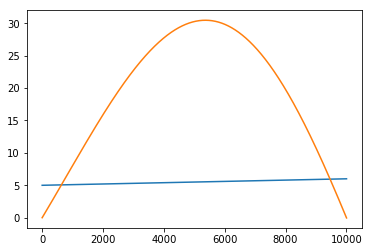

In [11]:
plt.plot(Pl1)
plt.show()

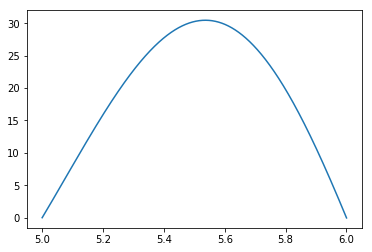

In [12]:
X1 = []
Y1 = []
for i in range(10004):
    X1.append(Pl1[i][0])
    Y1.append(Pl1[i][1])
plt.plot(X1, Y1)
plt.show()

Также интерполяционный многочлен Ньютона записывается в виде:

$$ P{n}(x) = f(xn) + \Delta^1 f(x{n})(x-xn)/1!h^1  + \Delta^2 f(xn-1) (x-xn)(x-x(n-1))/2!h^2 + ... + \Delta^n f(x1) (x-xn)(x-x(n-1))...(x-x1)/n!h^n$$

Эта формула эквивалентна предыдущей.

In [13]:
xn=5.9
h=0.1
def q(x):
    return (x-xn)/h

In [14]:
def Pp(n,x):
    P1=10.75785
    m=1
    for i in range(1,n):
        P=P1
        m = m*(q(x)+i-1)
        P1 = P + T[n-1-i][i]*m/np.math.factorial(i)
    return P1

5.0 -2.46560584449e-14 0.0
5.1 8.037451 8.037451
5.2 15.89357 15.89357
5.3 22.72513 22.72513
5.4 27.73269 27.73269
5.5 30.25 30.25
5.6 29.82532 29.82532
5.7 26.2854 26.2854
5.8 19.77381 19.77381
5.9 10.75785 10.75785


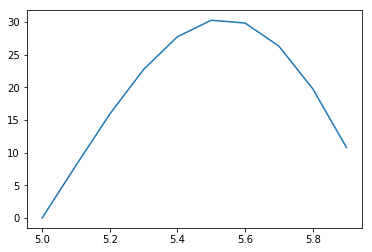

In [15]:
X = []
Y=[]
np.set_printoptions(suppress = True, precision = 4, linewidth = 100)
for i in range(10):
    X.append(x0+0.1*i)
    Y.append(Pp(10, x0+0.1*(i)))
    print(X[i], Y[i], T[i][0])
plt.plot(X,Y)
plt.show()

In [16]:
Pl2 = np.zeros((10004, 2))

for i in range(10004):
    Pl2[i][0] = 5 + 0.0001*(i-2)
    Pl2[i][1] = Pp(10,Pl2[i][0])

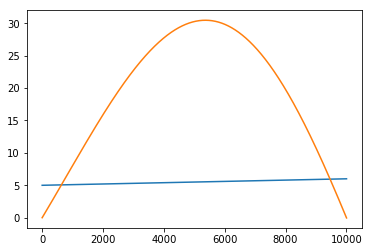

In [17]:
plt.plot(Pl1)
plt.show()

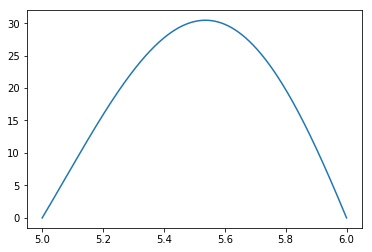

In [18]:
X1 = []
Y1 = []
for i in range(10004):
    X1.append(Pl2[i][0])
    Y1.append(Pl2[i][1])
plt.plot(X1, Y1)
plt.show()

Попытки кусочной интерполяции.
Линейная интерполяция:
Для каждой пары точек (x{i-1}, y{i-1}), (x{i}, y{i}) записывается уравнение прямой, проходящей через них:
$$ y(x) = a{0} + a{1}*x $$
что приводит к системе:
$$ y{i-1} = a{0} + a{1}*x{i-1}, y{i} = a{0} + a{1}*x{i}, i = 1,...,n $$
Её решение
$$ a{0} = y{i-1}-a{1}x{i-1}, a{1} = \Delta y{i}/\Delta x{i} $$

[[-401.8726   80.3745]
 [-392.6246   78.5612]
 [-339.3476   68.3156]
 [-242.6756   50.0756]
 [-108.202    25.1731]
 [  53.6074   -4.2468]
 [ 228.0608  -35.3992]
 [ 397.446   -65.1159]
 [ 542.6995  -90.1596]]


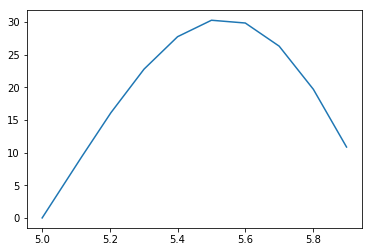

In [19]:
lin = np.zeros((9,2))
for i in range(9):
    lin[i][0] = T[i][0] - (5+0.1*(i))*T[i][1]/h
    lin[i][1] = T[i][1]/h
print(lin)

def flin(x):
    for i in range(9):
        if(x>5+0.1*(i) and x<5+0.1*(i+1)):
            return(lin[i][0] + x*lin[i][1])
        else:
            if(x==5+0.1*i):
                return(T[i][0])

Xl = []
Yl = []
for i in range(1000):
    Xl.append(5+0.001*i)
    Yl.append(flin(Xl[i]))
plt.plot(Xl, Yl)
plt.show()

# Интерполяция полиномом Лагранжа

Рассмотрим функцию w(x) = (x-x0)(x-x1)...(x-xn). Она обращается в 0 во всех точках сетки. Для k = 0,1,...,n поделим w(x) на слагаемое (x-xk). Полученная функция w(x,k) равна 0 во всех узлах, кроме k-го. Нормируя, получаем:
$$ w(x,k) = (x-x{0})(x-x{1})...(x-x{k-1})(x-x{k+1})...(x-x{n})/((x{k}-x{0})(x{k}-x{1})...(x{k}-x{k-1})(x{k}-x{k+1})...(x{k}-x{n}))$$
Данная функция из всех узлов сетки выбирает k-тый.
Домножая для каждого k на y{k}, получим многочлен Лагранжа, в узлах сетки точно совпадающий с интерполируемой функцией:
$$ L(x) = \Sigma  {i=0,...,n}  w(x,i)* y{i} $$

In [20]:
def w(x,k):
    po=1
    for i in range(9):
        if(i != k):
            po = po * (x-(5+0.1*i))
    return po

def lagr(x):
    l=0
    for i in range(9):
        l += T[i][0]*w(x,i)/w(5+0.1*i,i)
    return l
        

4.75 -15.9408372435
4.8 -13.53759
4.85 -10.6773770031
4.9 -7.41906600001
4.95 -3.83294668671
5.0 0.0
5.05 3.98942898712
5.1 8.037451
5.15 12.0408454402
5.2 15.89357
5.25 19.4894744852
5.3 22.72513
5.35 25.502688325
5.4 27.73269
5.45 29.3367433035
5.5 30.25
5.55 30.4233574051
5.6 29.82532
5.65 28.4434575047
5.7 26.2854
5.75 23.379314368
5.8 19.77381
5.85 15.5372254012
5.9 10.756251
5.95 5.53384715117
6.0 -0.0135800000411
6.05 -5.7597784446
6.1 -11.5730560002
6.15 -17.3215180582


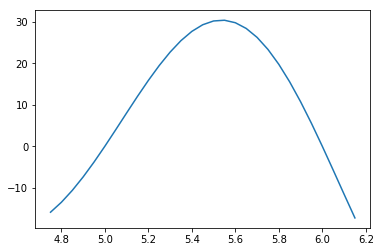

In [21]:
X = []
Y = []
for i in range(29):
    X.append(5+0.05*(i-5))
    Y.append(lagr(X[i]))
    print(X[i], Y[i])
plt.plot(X,Y)
plt.show()

# Численное дифференцирование

По формуле трёх узлов:
$$ y'(x0) = \Delta y1 /h,  y'(x1) = \Delta ^2 y1 /2h, y'(x2) = \Delta y2 /h $$
По формуле Ньютона:
$$ y'(x{i}) = (\Delta y{i} - \Delta ^2 y{i}/2)/h $$
По формуле Лагранжа:
$$ y'(x0) = (-3y{0}+4y{1}-y{2})/2h, y'(x1) = (y{2} - y{0})/2h, y'(x2) = (y{0}-4y{1}+3y{2})/2h $$

Newton:  81.28117
Three points:  78.56119
Lagrange:  81.28117
Newton:  83.683985
Three points:  79.46785
Lagrange:  79.46785
Newton:  77.4356
Three points:  73.438395
Lagrange:  73.438395
Newton:  62.52685
Three points:  59.1956
Lagrange:  59.1956
Newton:  39.88305
Three points:  37.62435
Lagrange:  37.62435
Newton:  11.3294
Three points:  10.46315
Lagrange:  10.46315
Newton:  -20.54085
Three points:  -19.823
Lagrange:  -19.823
Newton:  -52.59405
Three points:  -50.25755
Lagrange:  -50.25755
Newton:  -90.1596
Three points:  -77.63775
Lagrange:  -77.63775


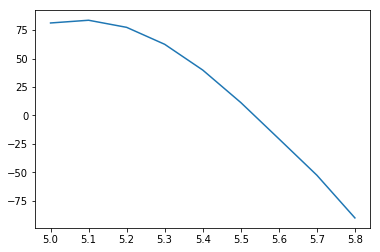

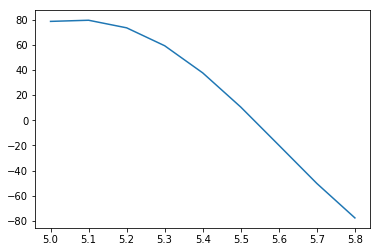

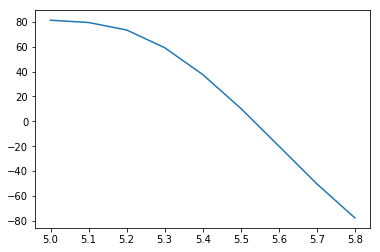

In [22]:
X=[]
DerN=[]
DerT = []
DerL = []

for i in range(9):
    X.append(5+0.1*i)
    DerN.append(10*(T[i][1]- 0.5*T[i][2]))
    print("Newton: ", DerN[i])
    if(i==0):
        DerT.append(10*T[1][1])
        DerL.append(5*(-3*T[0][0]+4*T[1][0]-T[2][0]))
    if(i==9):
        DerT.append(10*T[9][1])
        DerL.append(5*(T[7][0]-4*T[8][0]+3*T[9][0]))
    if(i>0 and i<9):
        DerT.append(5*(T[i-1][1]+T[i][1]))
        DerL.append(5*(T[i+1][0]-T[i-1][0]))
    print("Three points: ", DerT[i])
    print("Lagrange: ", DerL[i])
plt.plot(X,DerN)
plt.show()
plt.plot(X,DerT)
plt.show()
plt.plot(X,DerL)
plt.show()

The power of maximal component: 25
19.1281221
[-1.4517304457813061, -0.20722630170142131, -0.023795105263157368, 0.025548852745883477, 0.025548852745887529, -0.023795105263159311, -0.2072263017014182, -1.4517304457813005, 6.7116217894736838, -1.4517304457813087, -0.20722630170141976, -0.023795105263155703, 0.025548852745885864, 0.025548852745886086, -0.023795105263154814, -0.20722630170141954, -1.4517304457812872, 6.7116217894736838, -1.4517304457813218, -0.20722630170141931, -0.023795105263156036, 0.025548852745890249, 0.025548852745886919, -0.023795105263162697, -0.20722630170140366] [-0.86974935223541461, -0.25772743620751953, -0.11734914664299889, -0.035235443098024184, 0.035235443098027182, 0.11734914664300122, 0.25772743620752425, 0.86974935223541661, -8.4921013089299865e-15, -0.86974935223541328, -0.25772743620751798, -0.11734914664299695, -0.035235443098021617, 0.035235443098023379, 0.11734914664298361, 0.25772743620752647, 0.86974935223542038, -1.6984202617859973e-14, -0.86974

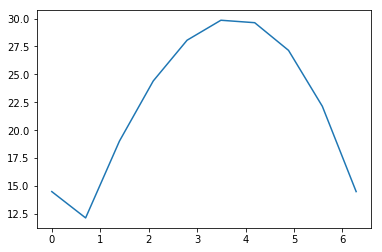

In [45]:
h1 = 2*pi/9
X=[]
Y=[]
F=[]
a0=0
An = []
Bn = []
a=0
b=0
n=int(input("The power of maximal component: "))
n += 1
for i in range(10):
    X.append(i*h1)
    Y.append(T[i][0])
    a0 += T[i][0]/10
print(a0)
for i in range(1,n):
    for j in range(10):
        a += 2*T[j][0]*cos(i*X[j])/(2*n+5)
        b += 2*T[j][0]*sin(i*X[j])/(2*n+5)
    An.append(a)
    Bn.append(b)
    a=0
    b=0
print(An,Bn)
Furie = a0/2
for i in range(10):
    for j in range(1,n):
        Furie += An[j-1]*cos(j*X[i]) + Bn[j-1]*sin(j*X[i])
    F.append(Furie)
    print(F[i-1])
    Furie=a0/2
plt.plot(X,F)
plt.show()

Enter the power of approximing polynome: 2
[[   10.        31.4159   138.9055]
 [   31.4159   138.9055   689.0284]
 [  138.9055   689.0284  3642.3072]]
[[  191.2812]
 [  689.853 ]
 [ 2912.0045]]
[[ -1.9829]
 [ 17.4271]
 [ -2.4216]]


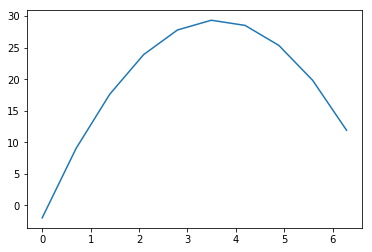

In [55]:
n=int(input("Enter the power of approximing polynome: "))+1
if(n<1 or n>6):
    print("Invalid input")
else:
    A = np.zeros((n,n))
    B = np.zeros((n,1))
    Solution = np.zeros((n,1))
    for i in range(n):
        for j in range(n):
            for k in range(10):
                A[i][j] += X[k]**(i+j)
    for i in range(n):
        for k in range(10):
            B[i][0] += T[k][0]*(X[k]**i)
    print(A)
    print(B)
    Solution = np.linalg.solve(A,B)
    print(Solution)
    D = np.zeros((10))
    for i in range(10):
        for j in range(n):
            D[i] += Solution[j][0]*(X[i]**j)
    plt.plot(X,D)
    plt.show()